### 1. Problem Formation


To what extent do the personalized playlists in music streaming platforms impact the number of streams for songs?

Using our data set we will use columns in_apple_playlists and in_spotify_playlists to determine how personalized playlist creations have impacted the number of streams songs gain.
The increasing prevalence of personalization in music streaming platforms like Spotify represents a significant shift in how users discover and engage with music. They not only shape the user experience but also influence the revenue streams of artists and the music industry as a whole. Understanding the impact of playlist additions, is crucial for stakeholders such as artists, record labels, and streaming platforms to optimize content delivery and user engagement strategies. By exploring this topic, we can uncover insights that contribute to the ongoing discourse on the intersection of technology, music consumption, and user preferences in the digital age. The work done by Barata, M. L., & Coelho, P. S. (2021) investigates how the possibility of personalisation has a substantial impact on music streaming services users (Lee and Waterman, 2012), with the creation of automatic playlists based on recommendation algorithms being important for them (Prey, 2018).

Works Cited (APA): Barata, M. L., & Coelho, P. S. (2021). Music streaming services: understanding the drivers of customer purchase and intention to recommend. Heliyon, 7(8), e07783. https://doi.org/10.1016/j.heliyon.2021.e07783

### 2. Data Acquisition



**Dataset Used:** [Spotify Music Dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music)

This dataset contains the top songs on Spotify. It includes various features such as song duration, artist details, streaming platforms, bpm, danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness. We will use these columns to create a prediction model.


### Column Explanations:

- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song


In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# load dataset
spotify_df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')
# show first five rows
spotify_df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

### 3. Data Preprocessing

In [ ]:
# Get information about the dataset
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Summary statistics of numerical columns
spotify_df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [ ]:
# Check the dimensions of the dataset
spotify_df.shape

(953, 24)

In [ ]:
# cleaning up the data
spotify_df.drop(index=574, inplace=True) #this col has a manual data entry error
spotify_df.reset_index(drop=True, inplace=True)

num_duplicates = len(spotify_df[spotify_df.duplicated()])
print("Number of duplicates:", num_duplicates)

num_nan_rows = spotify_df.isnull().sum().sum()
print("Number of NaN rows:", num_nan_rows)
print(spotify_df.isnull().sum())

Number of duplicates: 0
Number of NaN rows: 145
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [ ]:
# just confirming the empty rows
empty_rows = spotify_df[spotify_df.isnull().any(axis=1)]
empty_rows

track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
..                                                 ...   
900                                         After LIKE   
902              B.O.T.A. (Baddest Of Them All) - Edit   
926                I Really Want to Stay at Your House   
937                                          Labyrinth   
939                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
14                                        Harry Styles             1   
17                                       Billie Eilish             1   
22                                      Arctic Monkeys             1   
35   Big One, Duki, Lit Killah, Maria Becerra, FMK,...             8   
..                                                 ...           ...   
900                                                IVE             1   
902                Interplanetary Criminal, Eliza Rose             2   
926                        Rosa Walton, Hallie Coggins             2   
937                                       Taylor Swift             1   
939                                       Taylor Swift             1   

     released_year  released_month  released_day  in_spotify_playlists  \
12            2023               1            12                 12211   
14            2022               3            31                 23575   
17            2023               7            13                   873   
22            2013               1             1                 12859   
35            2023               6             1                  1150   
..             ...             ...           ...                   ...   
900           2022               8            22                   767   
902           2022               6            15                  5153   
926           2020              12            18                   668   
937           2022              10            21                  1597   
939           2022              10            21                  1747   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
12                 115  1316855716                 300  ...  118  NaN  Major   
14                 130  2513188493                 403  ...  174   F#  Minor   
17                 104    30546883                  80  ...   78  NaN  Major   
22                 110  1297026226                  24  ...  135  NaN  Minor   
35                  31   123122413                  22  ...  120  NaN  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
900                 12   265548837                  20  ...  125  NaN  Major   
902                  6   244585109                 102  ...  137  NaN  Major   
926                  1   140430339                   0  ...  125   D#  Minor   
937                  0   187339835                   6  ...  110  NaN  Major   
939                  0   186104310                   9  ...  177  NaN  Major   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
12              71         65       68              6                   0   
14              52         66       73             34                   0   
17              44         14        9             96                   0   
22              48         44       42             12                   2   
35              81         63       68             11                   0   
..             ...        ...      ...            ...                 ...   
900             68         80       92             10                   0   
902             

In [ ]:
#dropping key column since it will not be used in prediction model
spotify_df.drop(columns=['key'], inplace=True)

In [ ]:
#perform imputation for in_spotify_charts column
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce')
# Group the DataFrame by 'released_year' and calculate the median 'in_deezer_charts' for each year
median_by_year = spotify_df.groupby('released_year')['in_shazam_charts'].median()
# Function to impute missing values using median by release year
def impute_median_by_year(row):
    if pd.isnull(row['in_shazam_charts']):
        return median_by_year[row['released_year']]
    else:
        return row['in_shazam_charts']
spotify_df['in_shazam_charts'] = spotify_df.apply(impute_median_by_year, axis=1)
#check for missing values
print(spotify_df['in_shazam_charts'].isnull().sum())

1


In [ ]:
categorical_columns = spotify_df.select_dtypes(include='object').columns
print(categorical_columns)
#encode to numerical variables
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'])
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce')

Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
       'mode'],
      dtype='object')


In [ ]:
#use one-hot encoding to convert key column into a numeric column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'mode' column
spotify_df['mode_encoded'] = label_encoder.fit_transform(spotify_df['mode'])
spotify_df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
947                         My Mind & Me        Selena Gomez             1   
948            Bigger Than The Whole Sky        Taylor Swift             1   
949                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
950                        En La De Ella  Feid, Sech, Jhayco             3   
951                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
947           2022              11             3                   953   
948           2022              10            21                  1180   
949           2022              11             3                   573   
950           2022              10            20                  1320   
951           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm   mode  \
0                  147  141381703                  43  ...  125  Major   
1                   48  133716286                  48  ...   92  Major   
2                  113  140003974                  94  ...  138  Major   
3                  100  800840817                 116  ...  170  Major   
4                   50  303236322                  84  ...  144  Minor   
..                 ...        ...                 ...  ...  ...    ...   
947                  0   91473363                  61  ...  144  Major   
948                  0  121871870                   4  ...  166  Major   
949                  0   73513683                   2  ...   92  Major   
950                  0  133895612                  29  ...   97  Major   
951                  2   96007391                  27  ...   90  Minor   

     danceability_%  valence_%  energy_% acousticness_%  instrumentalness_%  \
0                80         89        83             31                   0   
1                71         61        74              7                   0   
2                51         32        53             17                   0   
3                55         58        72             11                   0   
4                65         23        80             14                  63   
..              ...        ...       ...            ...                 ...   
947              60         24        39             57                   0   
948              42          7        24             83                   1   
949              80         81        67              4                   0   
950              82         67        77              8                   0   
951              61         32        67             15                   0   

     liveness_%  speechiness_%  mode_encoded  
0             8              4             0  
1            10              4             0  
2            31              6             0  
3            11             15             0  
4            11              6             1  
..          ...            ...           ...  
947           8              3       

In [ ]:
num_duplicates = len(spotify_df[spotify_df.duplicated()])
print("Number of duplicates:", num_duplicates)

num_nan_rows = spotify_df.isnull().sum().sum()
print("Number of NaN rows:", num_nan_rows)
print(spotify_df.isnull().sum())

Number of duplicates: 0
Number of NaN rows: 80
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         1
bpm                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
mode_encoded             0
dtype: int64


The dataset underwent preprocessing to ensure data quality and reliability. Duplicates and NaN values were checked and addressed accordingly. A row with manual data entry error was removed to maintain accuracy. The Key column, containing a high number of NaN values and lacking usefulness, was dropped. Imputation was performed for missing values in the in_deezer_charts column using the median value by release year. Additionally, one-hot encoding was applied to the 'mode' column, representing 'Minor' as '1' and 'Major' as '0'. These preprocessing steps were essential for enhancing the dataset's integrity and preparing it for subsequent analysis.

### 3. EDA (Exploratory Data Analysis)

In [ ]:
numeric_df = spotify_df.select_dtypes(include='number')
# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr(method='pearson')
# Convert correlation matrix to a DataFrame and sort by 'streams'
cols = correlation_matrix['streams'].to_frame().sort_values(by='streams', ascending=False)
cols
#cols = correlation_matrix.loc[(correlation_matrix["streams"] >= 0.1) | (correlation_matrix["streams"] <= -0.1)].index.to_list()
# cols
correlation_matrix

artist_count  released_year  released_month  \
artist_count              1.000000       0.085614        0.037117   
released_year             0.085614       1.000000        0.071055   
released_month            0.037117       0.071055        1.000000   
released_day             -0.018493       0.169733        0.078391   
in_spotify_playlists     -0.102184      -0.397519       -0.105308   
in_spotify_charts        -0.018916       0.067564       -0.048594   
streams                  -0.136463      -0.230803       -0.024938   
in_apple_playlists       -0.051487      -0.203799       -0.001054   
in_apple_charts          -0.089336      -0.040950       -0.020618   
in_deezer_playlists      -0.094049      -0.222871       -0.045452   
in_deezer_charts         -0.004022       0.094321       -0.005948   
in_shazam_charts         -0.026568       0.017778       -0.098559   
bpm                      -0.038680      -0.007448       -0.039962   
danceability_%            0.206543       0.184904       -0.047893   
valence_%                 0.128712      -0.055354       -0.117267   
energy_%                  0.137317       0.097502       -0.083378   
acousticness_%           -0.101619      -0.129000        0.053357   
instrumentalness_%       -0.050359      -0.015575        0.033742   
liveness_%                0.042681      -0.006285       -0.012492   
speechiness_%             0.119486       0.131884        0.038821   
mode_encoded              0.094388       0.086462       -0.061263   

                      released_day  in_spotify_playlists  in_spotify_charts  \
artist_count             -0.018493             -0.102184          -0.018916   
released_year             0.169733             -0.397519           0.067564   
released_month            0.078391             -0.105308          -0.048594   
released_day              1.000000             -0.080191           0.020996   
in_spotify_playlists     -0.080191              1.000000           0.164182   
in_spotify_charts         0.020996              0.164182           1.000000   
streams                   0.010598              0.789822           0.245821   
in_apple_playlists        0.025555              0.708258           0.233057   
in_apple_charts           0.009586              0.271162           0.551985   
in_deezer_playlists      -0.019171              0.795122           0.166014   
in_deezer_charts          0.072718              0.144227           0.600101   
in_shazam_charts          0.011112              0.092334           0.482145   
bpm                      -0.030873             -0.019739           0.034435   
danceability_%            0.047613             -0.106885           0.029475   
valence_%                 0.044332             -0.021585           0.036205   
energy_%                  0.051022              0.033899           0.082124   
acousticness_%           -0.006938             -0.064683          -0.055513   
instrumentalness_%        0.019022             -0.028194          -0.010270   
liveness_%                0.001436             -0.046725          -0.047619   
speechiness_%            -0.016911             -0.089973          -0.082267   
mode_encoded             -0.000593             -0.049154           0.035858   

                       streams  in_apple_playlists  in_apple_charts  \
artist_count         -0.136463           -0.051487        -0.089336   
released_year        -0.230803           -0.203799        -0.040950   
released_month       -0.024938           -0.001054        -0.020618   
released_day          0.010598            0.025555         0.009586   
in_spotify_playlists  0.789822            0.708258         0.271162   
in_spotify_charts     0.245821            0.233057         0.551985   
streams               1.000000            0.772063         0.320234   
in_apple_playlists    0.772063            1.000000         0.414184   
in_apple_charts       0.320234            0.414184         1.000000   
in_deezer_playlists   0.746022            0.702775    

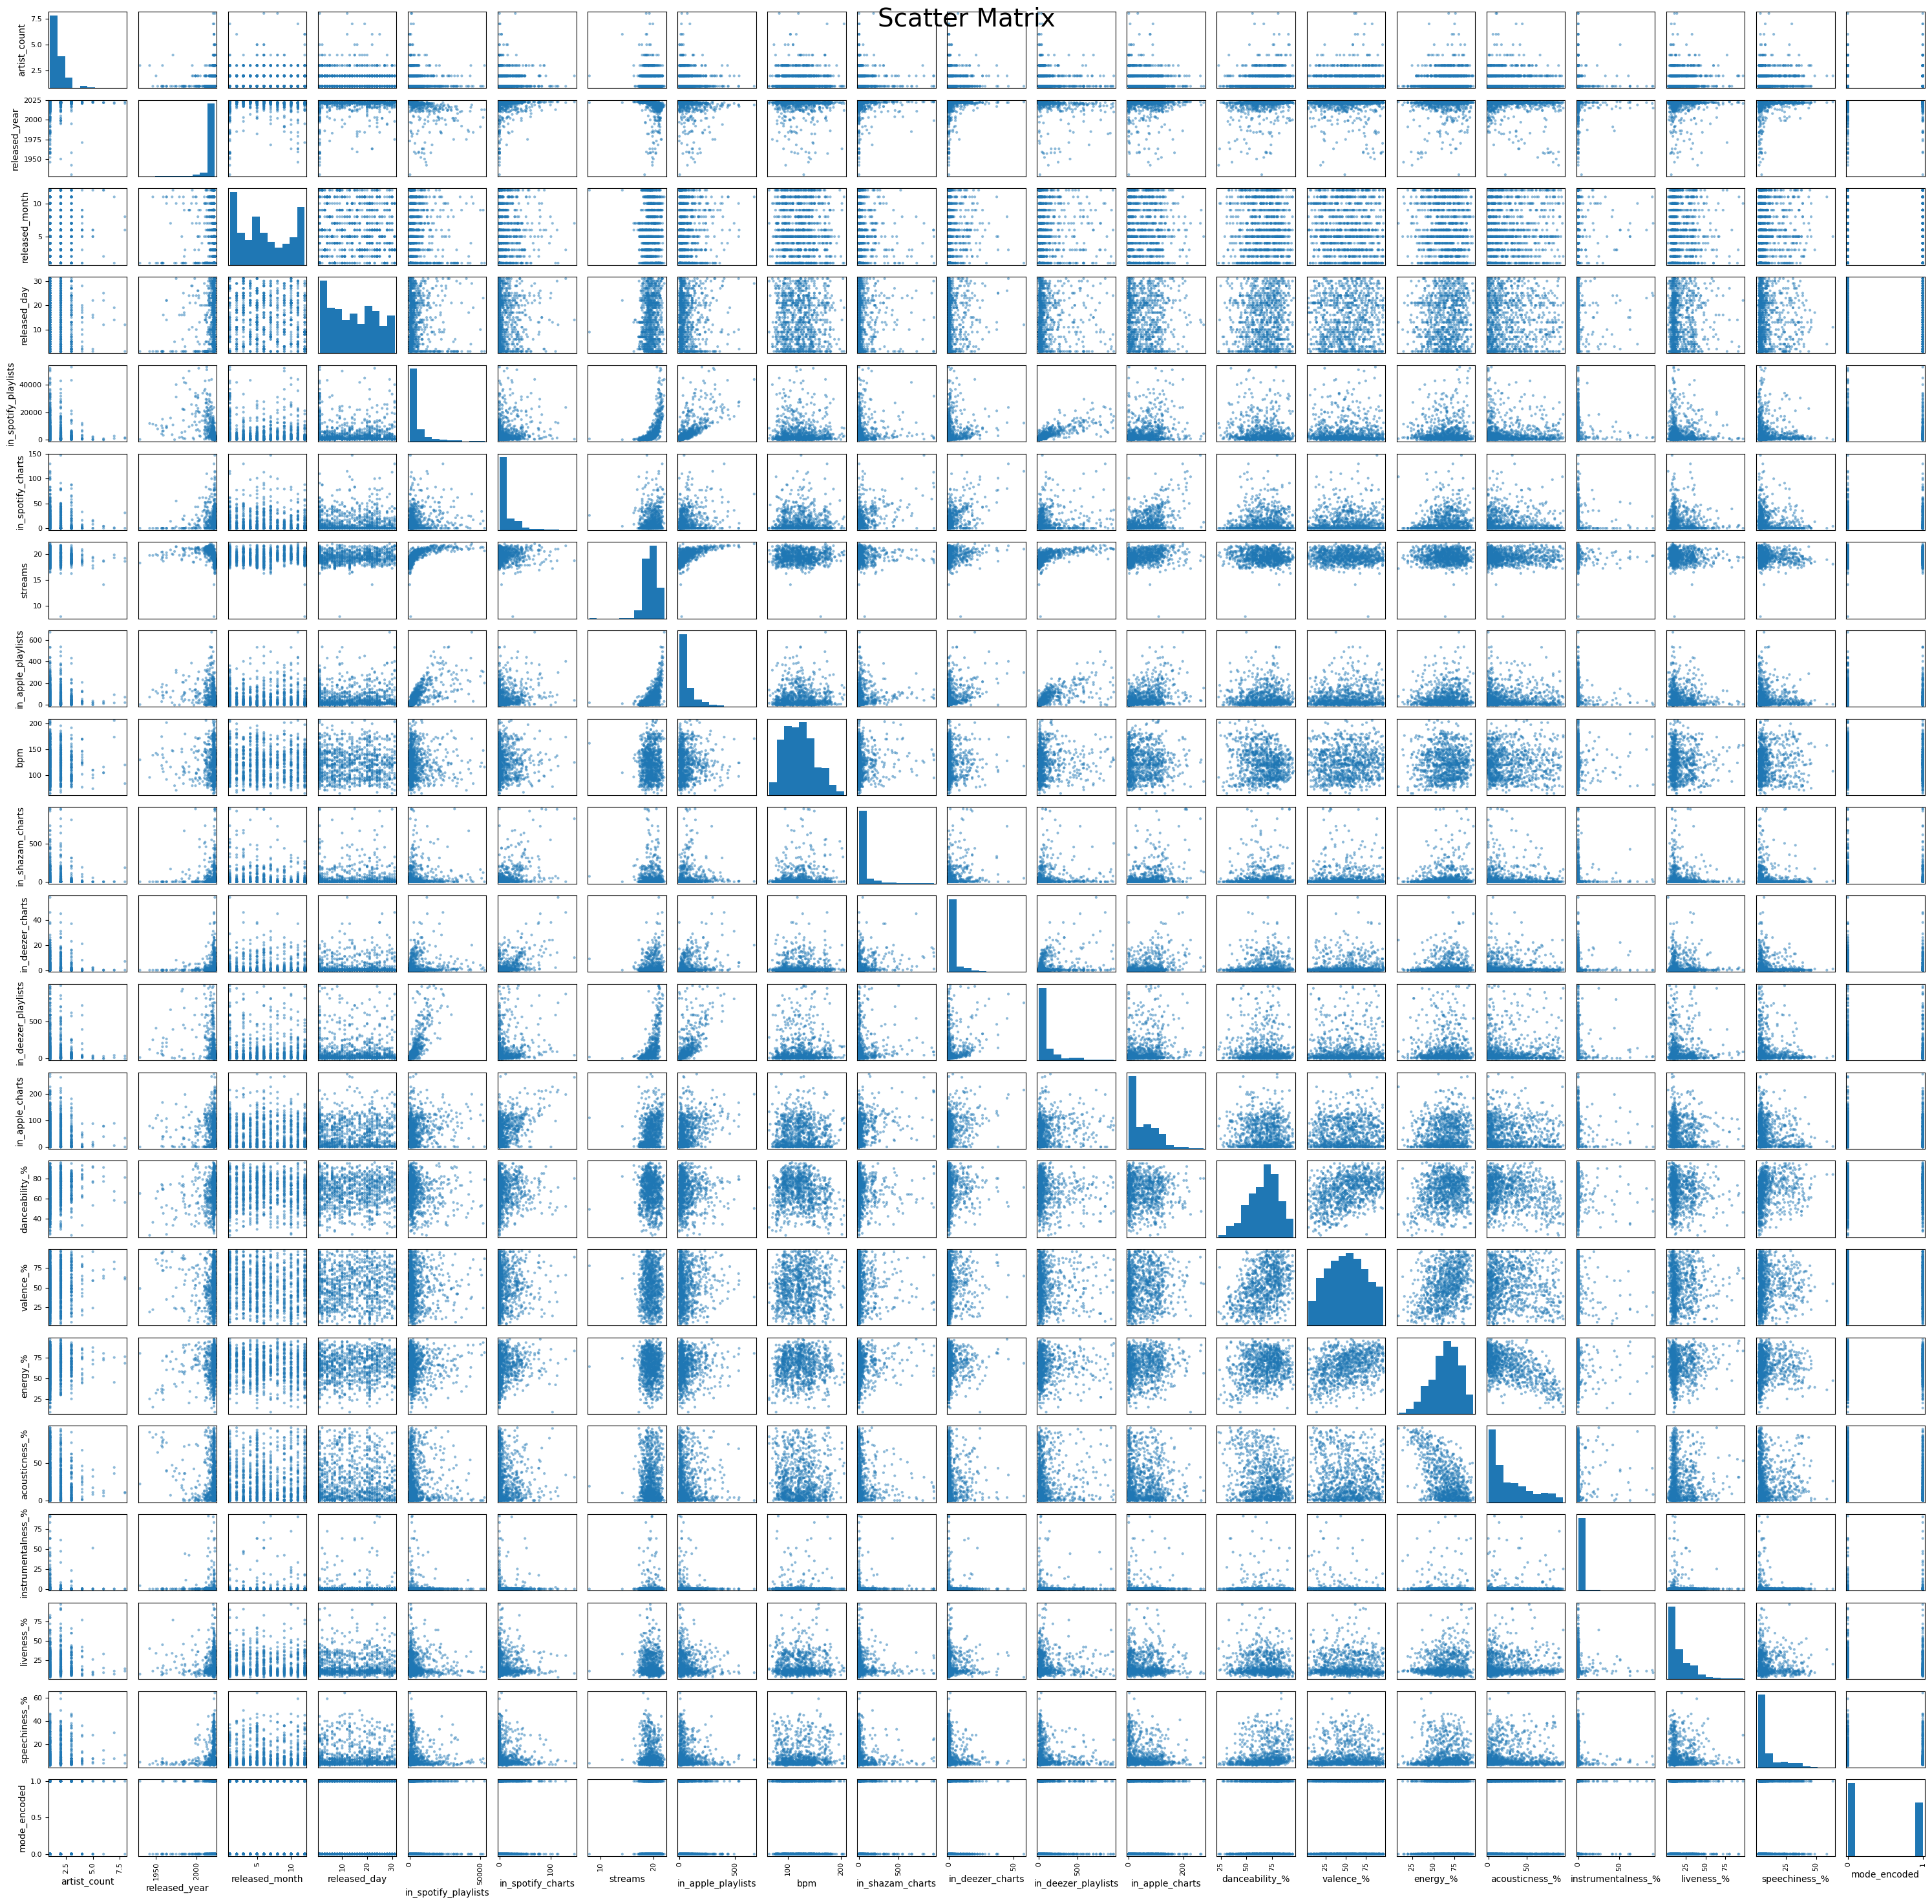

In [ ]:
continuous_vars = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists','in_spotify_charts', 'streams', 'in_apple_playlists', 'bpm', 'in_shazam_charts', 'in_deezer_charts', 'in_deezer_playlists', 'in_apple_charts',
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'mode_encoded'
]

scatter_matrix = pd.plotting.scatter_matrix(numeric_df[continuous_vars], figsize=(30, 30), alpha=0.5)
plt.suptitle("Scatter Matrix", fontsize=28)
plt.tight_layout()
plt.show()

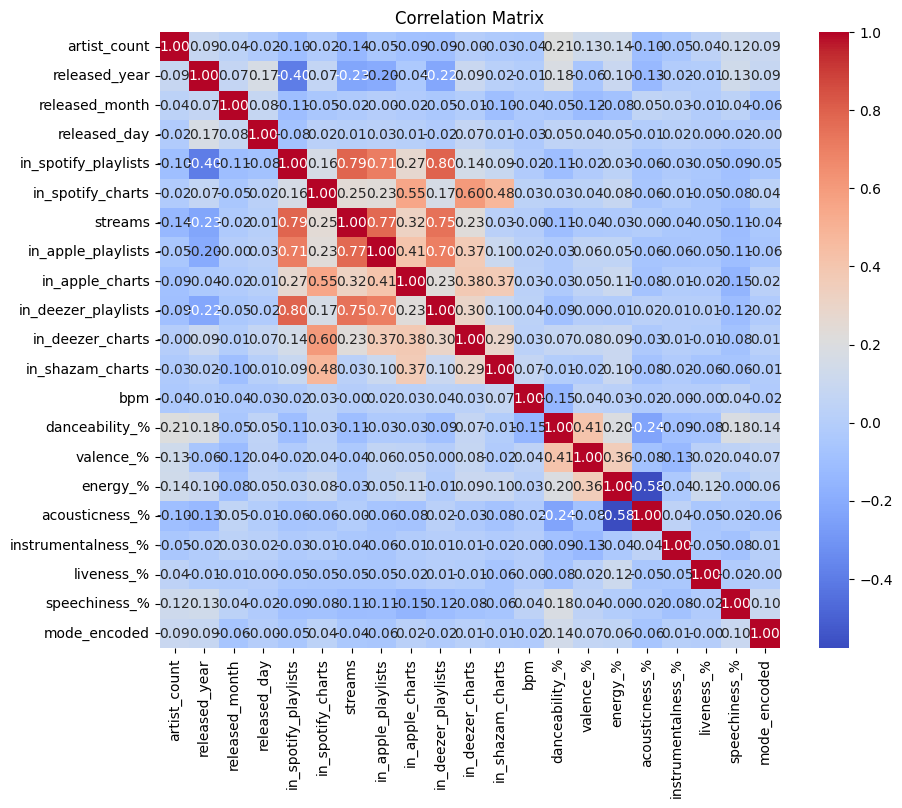

In [ ]:
import seaborn as sns
numeric_columns = spotify_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
numeric_columns = spotify_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
streams_correlation = correlation_matrix['streams']
streams_correlation

artist_count           -0.136463
released_year          -0.230803
released_month         -0.024938
released_day            0.010598
in_spotify_playlists    0.789822
in_spotify_charts       0.245821
streams                 1.000000
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_deezer_playlists     0.746022
in_deezer_charts        0.228598
in_shazam_charts        0.025434
bpm                    -0.002438
danceability_%         -0.105457
valence_%              -0.040831
energy_%               -0.026051
acousticness_%         -0.004485
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112333
mode_encoded           -0.042635
Name: streams, dtype: float64

In [ ]:
spotify_df_log2 = spotify_df.copy()
# Apply log transformation to streams only
spotify_df_log2["streams"] = spotify_df_log2["streams"].apply(lambda x: np.log1p(x))
numeric_df = spotify_df_log2.select_dtypes(include='number')
correlation_matrix_log = numeric_df.corr().sort_values(by='streams', ascending=False)
correlation_matrix_log

artist_count  released_year  released_month  \
streams                  -0.159049      -0.252009       -0.009774   
in_spotify_playlists     -0.102184      -0.397519       -0.105308   
in_apple_playlists       -0.051487      -0.203799       -0.001054   
in_deezer_playlists      -0.094049      -0.222871       -0.045452   
in_apple_charts          -0.089336      -0.040950       -0.020618   
in_deezer_charts         -0.004022       0.094321       -0.005948   
in_spotify_charts        -0.018916       0.067564       -0.048594   
in_shazam_charts         -0.026568       0.017778       -0.098559   
released_day             -0.018493       0.169733        0.078391   
bpm                      -0.038680      -0.007448       -0.039962   
released_month            0.037117       0.071055        1.000000   
instrumentalness_%       -0.050359      -0.015575        0.033742   
energy_%                  0.137317       0.097502       -0.083378   
acousticness_%           -0.101619      -0.129000        0.053357   
mode_encoded              0.094388       0.086462       -0.061263   
valence_%                 0.128712      -0.055354       -0.117267   
liveness_%                0.042681      -0.006285       -0.012492   
danceability_%            0.206543       0.184904       -0.047893   
speechiness_%             0.119486       0.131884        0.038821   
artist_count              1.000000       0.085614        0.037117   
released_year             0.085614       1.000000        0.071055   

                      released_day  in_spotify_playlists  in_spotify_charts  \
streams                   0.033231              0.632161           0.165925   
in_spotify_playlists     -0.080191              1.000000           0.164182   
in_apple_playlists        0.025555              0.708258           0.233057   
in_deezer_playlists      -0.019171              0.795122           0.166014   
in_apple_charts           0.009586              0.271162           0.551985   
in_deezer_charts          0.072718              0.144227           0.600101   
in_spotify_charts         0.020996              0.164182           1.000000   
in_shazam_charts          0.011112              0.092334           0.482145   
released_day              1.000000             -0.080191           0.020996   
bpm                      -0.030873             -0.019739           0.034435   
released_month            0.078391             -0.105308          -0.048594   
instrumentalness_%        0.019022             -0.028194          -0.010270   
energy_%                  0.051022              0.033899           0.082124   
acousticness_%           -0.006938             -0.064683          -0.055513   
mode_encoded             -0.000593             -0.049154           0.035858   
valence_%                 0.044332             -0.021585           0.036205   
liveness_%                0.001436             -0.046725          -0.047619   
danceability_%            0.047613             -0.106885           0.029475   
speechiness_%            -0.016911             -0.089973          -0.082267   
artist_count             -0.018493             -0.102184          -0.018916   
released_year             0.169733             -0.397519           0.067564   

                       streams  in_apple_playlists  in_apple_charts  \
streams               1.000000            0.613879         0.270380   
in_spotify_playlists  0.632161            0.708258         0.271162   
in_apple_playlists    0.613879            1.000000         0.414184   
in_deezer_playlists   0.563301            0.702775         0.225226   
in_apple_charts       0.270380            0.414184         1.000000   
in_deezer_charts      0.191776            0.368862         0.383443   
in_spotify_charts     0.165925            0.233057         0.551985   
in_shazam_charts      0.036332            0.103677         0.371502   
released_day          0.033231            0.025555         0.009586   
bpm                   0.010258            0.023450    

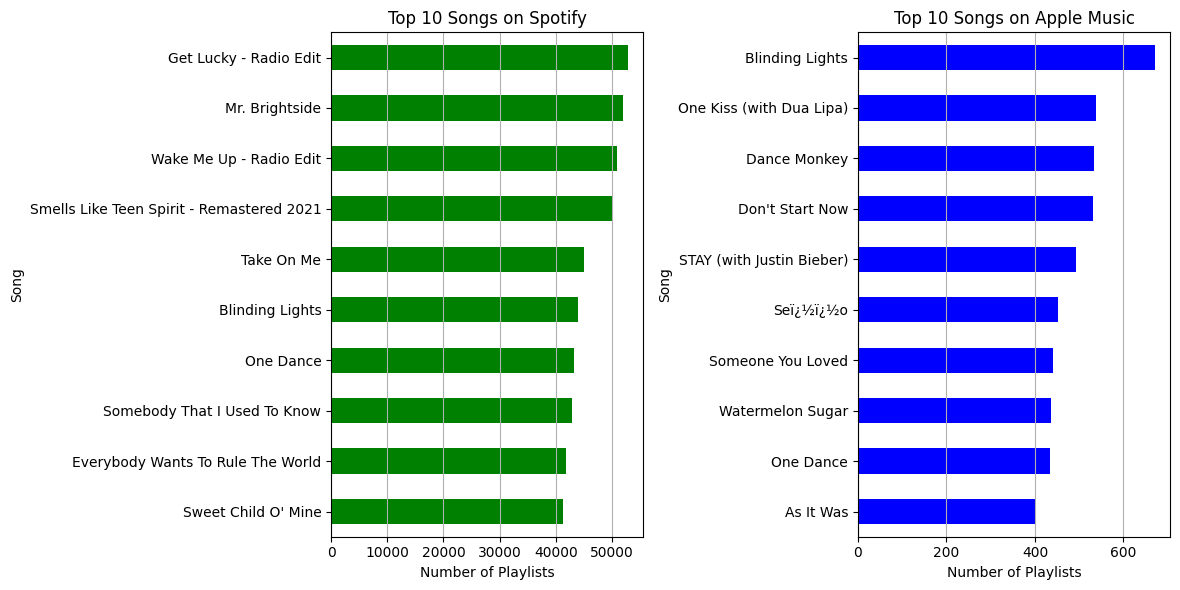

In [ ]:
top_10_spotify = spotify_df.sort_values(by='in_spotify_playlists', ascending=False).head(10)
top_10_spotify = top_10_spotify.set_index('track_name')

top_10_apple = spotify_df.sort_values(by='in_apple_playlists', ascending=False).head(10)
top_10_apple = top_10_apple.set_index('track_name')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_10_spotify['in_spotify_playlists'].sort_values().plot(kind='barh', color='green')
plt.xlabel('Number of Playlists')
plt.ylabel('Song')
plt.title('Top 10 Songs on Spotify')
plt.grid(axis='x')

plt.subplot(1, 2, 2)
top_10_apple['in_apple_playlists'].sort_values().plot(kind='barh', color='blue')
plt.xlabel('Number of Playlists')
plt.ylabel('Song')
plt.title('Top 10 Songs on Apple Music')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

Firstly we displayed a scattermatrix of continous numerical variables to see the shape and distibution of variables amongst each other. The strongest relationships appeared to be between playlist addition variables and streams as visible by the straight lines. Then we visualized the data of the correlation matrix in a heatmap. Here we could see the relationships in futher details.

High correlation between streams and in_spotify_playlist, in_apple_playlist and in_deezer_playlist (0.79,0.77,0.75) respectively. There were also some weak positive correlations between song attributes such as danceability and valence and energy and acousticness, all of which had a correlation less than or equal to 0.1, so they were quite weak.

We also did a log transformation on our output variable, streams, to see if this would increase the strength of any of our correlations. However, this largely did not change much, so we decided to stick with the not-log-transformed streams.

Looking at this we chose to model a linear regression prediction model to predict the number of streams by playlist additions. as the shape and correlation values of the data indicate there is a relationship that can be further explored.



## 6. Modelling

We opted for linear regression analysis due to the nature of our prediction task. Given that we aimed to forecast the number of streams based on the song's inclusion in playlists on both Apple and Spotify platforms, classification was not applicable. Therefore, linear regression was chosen as the appropriate method for our analysis. Furthermore, we specifically selected Apple Streams and Spotify Streams variables due to their demonstrated highest correlation with the number of streams, thus providing the most reliable predictors for our model.
We opted against including other variables such as danceability, speechiness, and energy in our model due to their weak correlations with the number of streams. Despite exploring these factors, our analysis revealed minimal indications of significant correlation. Hence, we focused solely on variables with stronger correlations, such as Apple Streams and Spotify Streams, to ensure the robustness of our predictive model.

Finalized Dependent Variables: Streams

Finalized Manipulated Variables: In Spotify Playlists and/or Apple Playlists







We want our model to look like a positive linear regression model.

In [ ]:
X_spotify = spotify_df['in_spotify_playlists'].to_frame()
y_spotify = spotify_df['streams']

simple_model = LinearRegression().fit(X_spotify, y_spotify)

slope = simple_model.coef_[0]
intercept = simple_model.intercept_

print("Slope: " + str(slope))
print("Intercept: " + str(intercept))

Slope: 56662.8877355539
Intercept: 219345061.2647729


In [ ]:
r_squared_1 = simple_model.score(spotify_df[["in_spotify_playlists"]], spotify_df["streams"])
print("R squared: " + str(r_squared_1))

R squared: 0.6238190443560807


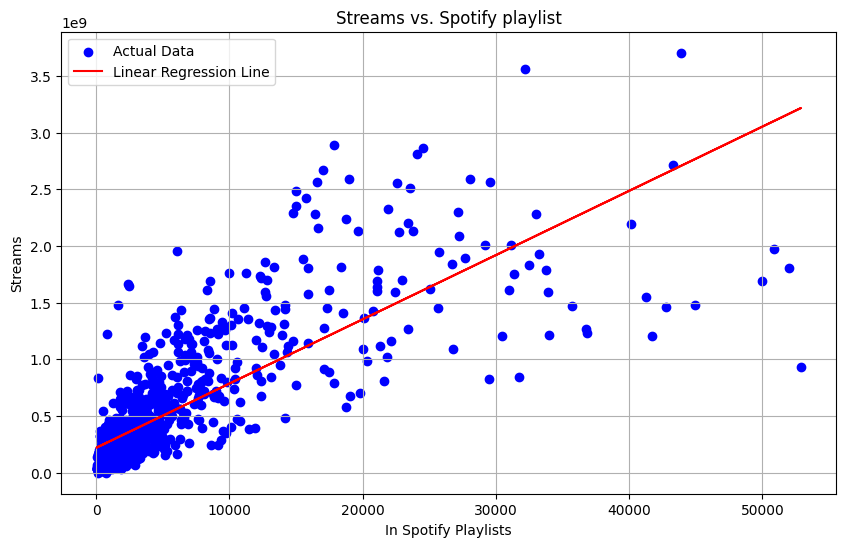

In [ ]:
X_spotify = spotify_df['in_spotify_playlists'].values.reshape(-1, 1)
y_spotify = spotify_df['streams']

model = LinearRegression()
model.fit(X_spotify, y_spotify)

y_pred_spotify = model.predict(X_spotify)

plt.figure(figsize=(10, 6))
plt.scatter(X_spotify, y_spotify, color='blue', label='Actual Data')
plt.plot(X_spotify, y_pred_spotify, color='red', label='Linear Regression Line')

plt.title('Streams vs. Spotify playlist')
plt.xlabel('In Spotify Playlists')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression Equation for Streams and Spotify Playlists:

y=56662.888+219345061.265* X{in_spotify_playlists}

In [ ]:
X_apple = spotify_df['in_apple_playlists'].to_frame()
y_apple = spotify_df['streams']
simple_model = LinearRegression().fit(X_apple, y_apple)

slope = simple_model.coef_[0]

print("Slope: " + str(slope))
print("Intercept: " + str(intercept))

Slope: 5061249.892489341
Intercept: 219345061.2647729


In [ ]:
r_squared_1 = simple_model.score(spotify_df[["in_apple_playlists"]], spotify_df["streams"])
print("R squared: " + str(r_squared_1))

R squared: 0.5960812513896958


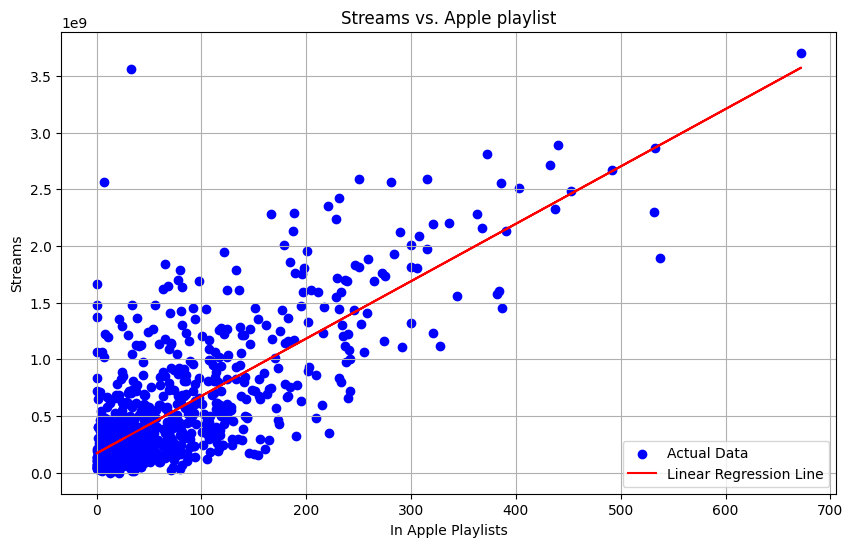

In [ ]:
x_apple = spotify_df['in_apple_playlists'].values.reshape(-1, 1)  # Reshape X to a 2D array as required by scikit-learn
y_apple = spotify_df['streams']

model = LinearRegression()
model.fit(x_apple, y_apple)

y_pred_apple = model.predict(x_apple)

plt.figure(figsize=(10, 6))
plt.scatter(x_apple, y_apple, color='blue', label='Actual Data')
plt.plot(x_apple, y_pred_apple, color='red', label='Linear Regression Line')

plt.title('Streams vs. Apple playlist')
plt.xlabel('In Apple Playlists')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.show()

# Linear regression equation for streams against apple playlists:

y=5061249.892+170647619.998*X

In [ ]:
from sklearn.linear_model import LinearRegression

X_playlist = spotify_df[['in_apple_playlists', 'in_spotify_playlists']]
y_playlist = spotify_df['streams']

mlr_model = LinearRegression()

mlr_model.fit(X_playlist, y_playlist)

print("Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)


Coefficients: [2797363.96226807   34980.62127509]
Intercept: 142300892.92695004


In [ ]:
r_squared_1 = mlr_model.score(spotify_df[["in_apple_playlists", "in_spotify_playlists"]], spotify_df["streams"])
print("R squared: " + str(r_squared_1))

R squared: 0.7145677683310974


# MLR Linear regression equation
streams = 142300892.927 + 2797363.962{apple_playlists} + 34980.621{spotify_playlists}


The above couple of cells develop a simple linear regression model using in_spotify_playlists, another simple linear regression model using in_apple_playlists, and lastly a multiple linear regression model using both variables.

However, it is important to note that in_spotify_playlists and in_apple_playlists are strongly correlated with one another. They have a correlation coefficient of 0.7. In fact, the R squared hardly increases when we add in_apple_playlists to our model (it increases by less than 0.1).

Thus, using both of these variables as explanatory variables is likely redunant; we could just stick with one. So we will just stick with in_spotify_playlists and use this as our explanatory variable. (Similarly we did not bother to include in_deezer_playlists as it was even more highly correlated with in_spotify_playlists - 0.8)

In [ ]:
model_1 = LinearRegression().fit(spotify_df[["artist_count", "released_year", "in_spotify_playlists"]], spotify_df["streams"])
r_squared_1 = model_1.score(spotify_df[["artist_count", "released_year", "in_spotify_playlists"]], spotify_df["streams"])
r_squared_1

0.6357051061179366

In [ ]:
model_1 = LinearRegression().fit(spotify_df[["danceability_%", "energy_%", "liveness_%", "in_spotify_playlists"]], spotify_df["streams"])
r_squared_1 = model_1.score(spotify_df[["danceability_%", "energy_%", "liveness_%", "in_spotify_playlists"]], spotify_df["streams"])
r_squared_1

0.6267667556344472

Here we tried to add some more variables to our model to see if they would have any significant effect on our model. We chose variables that were not super correlated with each other to avoid any issues of multicollinearity.

However, including these other variables had little impact on the R squared of our model. Thus, we ultimately decided to just stick with in_spotify_playlists as our predictor.

We are using the linear regression model because according to the EDA done before there is reason to believe that the relationship between the independent and dependent variables is linear. We are expecting the playlist additions to have proportional changes on the streams. Moreover, it can help identify which predictors have the most significant impact on the outcome.

# 6.2 Model Summary

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = spotify_df[['in_spotify_playlists']]
y = spotify_df['streams']
model = LinearRegression().fit(X, y)

#make predictions
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r_squared = model.score(X, y)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)

Mean Squared Error (MSE): 1.2075005128866053e+17
R-squared (R^2): 0.6238190443560807


To validate our model we are using MSE and R^2.
Interpretation of Mean Squared Error (MSE) and R^2:

The MSE is a measure of the average squared difference between the actual and predicted values of the target variable. The MSE is approximately 1.2 x 10^17. This means, on average, the squared difference between the actual streams and the predicted streams by the MLR model is 1.2 x 10^17.

The R^2 coefficient of determination measures the proportion of variance in the target variable that is explained by the independent variables in the model.
The R^2 value is approximately 0.624, indicating that approximately 62.4% of the variance in the streams can be explained by the independent variables (in_spotify_playlists) included in the MLR model. This value is relatively high and a higher R^2 value suggests that the model provides a better fit to the data.


### 7. Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X= spotify_df[['in_spotify_playlists']]
y = spotify_df['streams']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (761, 1)
X_test shape: (191, 1)


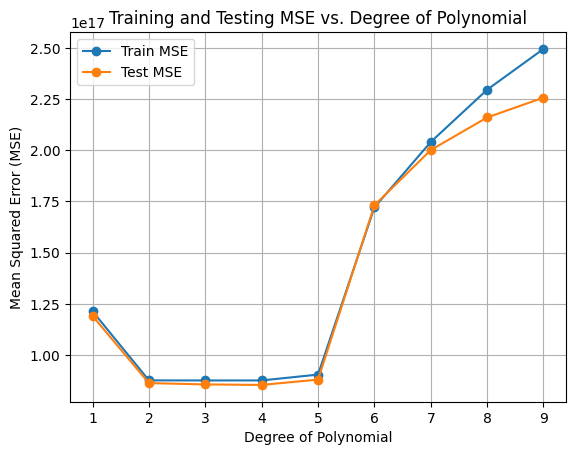

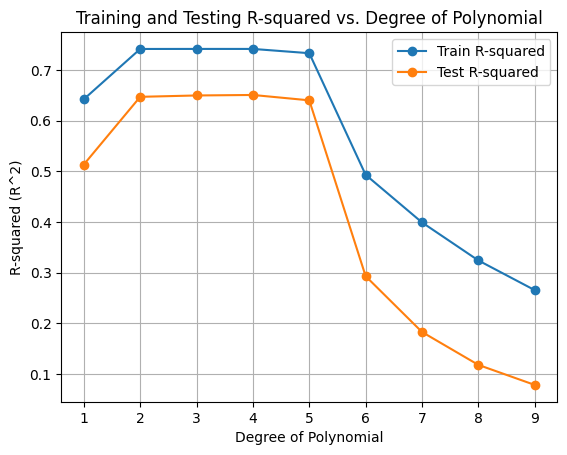

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

degrees = range(1, 10)
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.plot(degrees, test_mse, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE vs. Degree of Polynomial')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

plt.plot(degrees, train_r2, label='Train R-squared', marker='o')
plt.plot(degrees, test_r2, label='Test R-squared', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared (R^2)')
plt.title('Training and Testing R-squared vs. Degree of Polynomial')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 226920360.82363224


Here we can see that the error of both our training model and our testing model decrease as we go to a polynomial of degree 2. However, the error increases after that with increasing polynomial degree, since the MSE goes up and correspondingly the R squared goes down. And the error increases quite drastically after the 5th polynomial. Thus, we want to make sure that we choose a model that decreases the error, but does not fit the training data so closely that the model does not adapt well to unseen data. So, the optimal degree of the polynomial would likely be degree 2, as it decreases the error the most without overfitting or underfitting.

Note also that we see the testing error is lower than the training error which is to be expected as it is only natural that the model would fit our training data better than the testing data.

### 8. Interpretation and Conclusion

**Strength**: With a high R^2 value, the model has good predictive power, meaning it can accurately predict the streams based on the values of the independent variables. This can be valuable for making informed decisions or forecasts related to streaming consumption.

**Weakness**: Might possibly have some overfitting by choosing a higher degree polynomial.

In terms for real world application, it makes sense that songs that are often recommended in playlists will be shared to other users who may also like other songs on that playlist, propagating to other users.
Interestingly, factors that are related to the “sound” of music, ex. danceability, energy or BPM is not as highly correlated, despite the importance a “hit song formula” for companies involved in music production. Spotify playlists and Apple playlists are very correlated with the number of streams that a song gains. In that case, for a song to rise in streams, artists and music production companies would ideally want their songs in as many playlists as possible to be recommended to users. That also means that popular songs tend to get even more popular as Spotify algorithms likely use streams as a variable in their recommendation algorithm.

####Recommendations
Adding Datasets/Different Variables:
* This dataset does only focus on Spotify streams specifically. Variables that affect streams may differ between platforms, which is important to note. For further research, combining different datasets with this data set could provide further insights.
* Augmenting this music data set with different genres could possible show even more correlation with streams, where different genres may produce more hits than others.

Different topics of research based on streams:
* It would be interesting to see if there would be marketing research on putting new and rising artists in as many playlists and possible and seeing how the streams may be influenced by such a thing.
* Further exploration could be done on if user generated playlists have more of an impact on streams than algorithmically generated playlists  since the two different variables (Spotify playlists and Apple playlists)




###References: Works Cited (APA)
* Arnav, Kumar. (2023, October). Top Spotify Songs, Version 1. Retrieved April 4, 2024, from [https://www.kaggle.com/datasets/arnavvvvv/spotify-music](https://www.kaggle.com/datasets/arnavvvvv/spotify-music).
* Barata, M. L., & Coelho, P. S. (2021). Music streaming services: understanding the drivers of customer purchase and intention to recommend. Heliyon, 7(8), e07783. https://doi.org/10.1016/j.heliyon.2021.e07783
* OpenAI. (2024). ChatGPT 3.5 [Large language model]. https://chat.openai.com/chat